<a href="https://colab.research.google.com/github/Bhavin52/practice/blob/main/TCS_BIRLA_SOFT_TECH_MAHI_normal_dis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
birla_df = pd.read_csv("/content/birla_soft.csv")
tech_mahindra_df = pd.read_csv("/content/tech_mahindra.csv")
tcs_df = pd.read_csv("/content/TCS.csv")
birla_df[0:5]


,Date,Open,High,Low,Close,Total Trade Quantity,Turnover
0,19-05-2022,388.70,389.00,377.05,382.80,1893,22690577
1,18-05-2022,387.00,400.95,382.00,389.30,2663,35725878
2,17-05-2022,367.90,388.05,362.45,383.10,4144,44228039
3,16-05-2022,360.35,367.85,355.20,362.45,2805,35561134
4,13-05-2022,364.10,375.25,356.40,358.10,4791,41498854


In [9]:
birla_df = birla_df[['Date', 'Close']]
tech_mahindra_df = tech_mahindra_df[['Date', 'Close']]
tcs_df = tcs_df[['Date', 'Close']]


In [11]:
'''The DataFrames have a date column, so we can
create a DatetimeIndex index from this column Date. It will ensure that the rows are sorted by time in
ascending order.'''
birla_df = birla_df.set_index(pd.DatetimeIndex(birla_df['Date']))
tech_mahindra_df = tech_mahindra_df.set_index(pd.DatetimeIndex(tech_mahindra_df['Date']))
tcs_df = tcs_df.set_index(pd.DatetimeIndex(tcs_df['Date']))

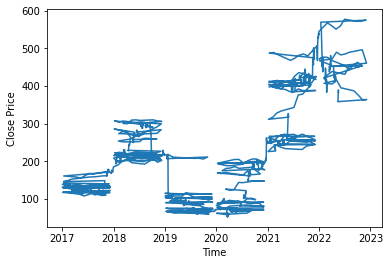

In [12]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.plot(birla_df.Close);
plt.xlabel('Time');
plt.ylabel('Close Price');

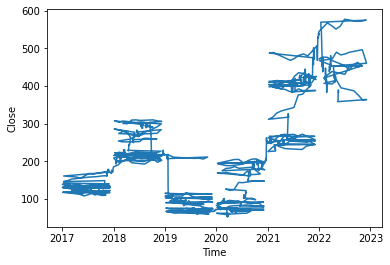

In [13]:
plt.plot(birla_df.Close);
plt.xlabel('Time');
plt.ylabel('Close');

In [14]:
birla_df['gain'] = birla_df.Close.pct_change(periods = 1)
tech_mahindra_df['gain'] = tech_mahindra_df.Close.pct_change(periods = 1)
tcs_df['gain'] = tcs_df.Close.pct_change(periods = 1)

In [15]:
#drop first row since it is NaN
birla_df = birla_df.dropna()
tech_mahindra_df = tech_mahindra_df.dropna()
tcs_df = tcs_df.dropna()

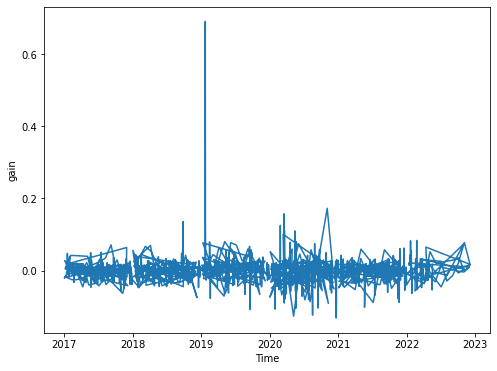

In [16]:
#Plot the gains
plt.figure(figsize = (8, 6));
plt.plot(birla_df.index, birla_df.gain);
plt.xlabel('Time');
plt.ylabel('gain');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


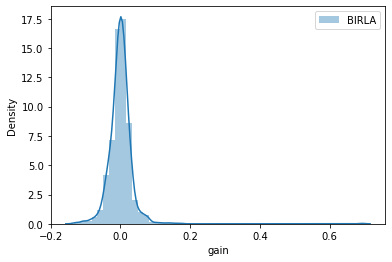

In [19]:
sn.distplot(birla_df.gain, label = 'BIRLA');
plt.xlabel('gain');
plt.ylabel('Density');
plt.legend();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


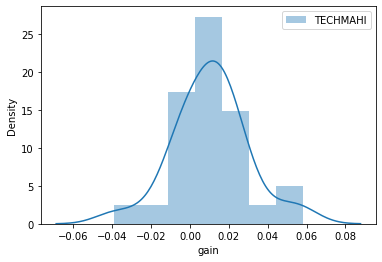

In [18]:
sn.distplot(tech_mahindra_df.gain, label = 'TECHMAHI');
plt.xlabel('gain');
plt.ylabel('Density');
plt.legend();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


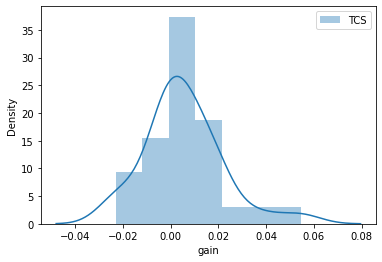

In [20]:
sn.distplot(tcs_df.gain, label = 'TCS');
plt.xlabel('gain');
plt.ylabel('Density');
plt.legend();

In [21]:
print('Mean:', round(birla_df.gain.mean(), 4))
print('Standard Deviation: ', round(birla_df.gain.std(), 4))

Mean: -0.0002
Standard Deviation:  0.0347


In [22]:
print('Mean: ', round(tech_mahindra_df.gain.mean(), 4))
print('Standard Deviation: ', round(tech_mahindra_df.gain.std(), 4))

Mean:  0.0104
Standard Deviation:  0.0194


In [23]:
print('Mean: ', round(tcs_df.gain.mean(), 4))
print('Standard Deviation: ', round(tcs_df.gain.std(), 4))

Mean:  0.0054
Standard Deviation:  0.0164


In [24]:
from scipy import stats
#Probability of making 2% loss or higher in Birla_soft
stats.norm.cdf( -0.02,
loc=birla_df.gain.mean(),
scale=birla_df.gain.std())

0.2844337439383646

In [25]:
#Probability of making 2% gain or higher in Birla_soft
1 - stats.norm.cdf(0.02,
loc=birla_df.gain.mean(),
scale=birla_df.gain.std())

0.27986423559329643

In [26]:
#Probability of making 2% loss or higher in tech_mahindra
stats.norm.cdf( -0.02,
loc=tech_mahindra_df.gain.mean(),
scale=tech_mahindra_df.gain.std())

0.058684005250250595

In [27]:
1 - stats.norm.cdf(0.02,
loc=tech_mahindra_df.gain.mean(),
scale=tech_mahindra_df.gain.std())

0.31091253668073315